In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

Load Dataset

In [ ]:
df=pd.read_csv('../datasets/dataset_raw.csv')
df.head()

Shape of the dataset

In [3]:
df.shape

(1190, 12)

Standardized the column name

In [4]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [5]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'st_slope', 'target'],
      dtype='object')

In [6]:
df.dtypes

age                      int64
sex                      int64
chest_pain_type          int64
resting_bp_s             int64
cholesterol              int64
fasting_blood_sugar      int64
resting_ecg              int64
max_heart_rate           int64
exercise_angina          int64
oldpeak                float64
st_slope                 int64
target                   int64
dtype: object

Checking null value

In [7]:
df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
target                 0
dtype: int64

Conclusion: No imputation required

In [8]:
binary_list=['sex','fasting_blood_sugar','exercise_angina']
for col in binary_list:
    print(f"{col} may be= {df[col].unique()}")

sex may be= [1 0]
fasting_blood_sugar may be= [0 1]
exercise_angina may be= [0 1]


Removing the duplicate tuples

In [9]:
df.duplicated().sum()

np.int64(272)

In [10]:
df=df.drop_duplicates()
df.shape

(918, 12)

Checking the outlier- inter-quartile range

In [11]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return lower, upper, outliers


num_col=['age','resting_bp_s','cholesterol','max_heart_rate','oldpeak']
for col in num_col:
    lower, upper, income_outliers = detect_outliers_iqr(df, col)
    print('Column=',col)
    print("Lower bound:", lower)
    print("Upper bound:", upper)
    print("Number of outliers:", income_outliers.shape[0],'\n')

Column= age
Lower bound: 27.5
Upper bound: 79.5
Number of outliers: 0 

Column= resting_bp_s
Lower bound: 90.0
Upper bound: 170.0
Number of outliers: 28 

Column= cholesterol
Lower bound: 32.625
Upper bound: 407.625
Number of outliers: 183 

Column= max_heart_rate
Lower bound: 66.0
Upper bound: 210.0
Number of outliers: 2 

Column= oldpeak
Lower bound: -2.25
Upper bound: 3.75
Number of outliers: 16 



========================================================================

In [12]:
df_ori=df.copy()

Capping the column to reduce the outlier

In [13]:
# capping the oldpeak column
df['oldpeak']=df['oldpeak'].clip(-2.25,3.75)

In [14]:
lower, upper, income_outliers = detect_outliers_iqr(df, 'oldpeak')
print('Column=',col)
print("Lower bound:", lower)
print("Upper bound:", upper)
print("Number of outliers:", income_outliers.shape[0],'\n')

Column= oldpeak
Lower bound: -2.25
Upper bound: 3.75
Number of outliers: 0 



<Axes: xlabel='cholesterol', ylabel='Count'>

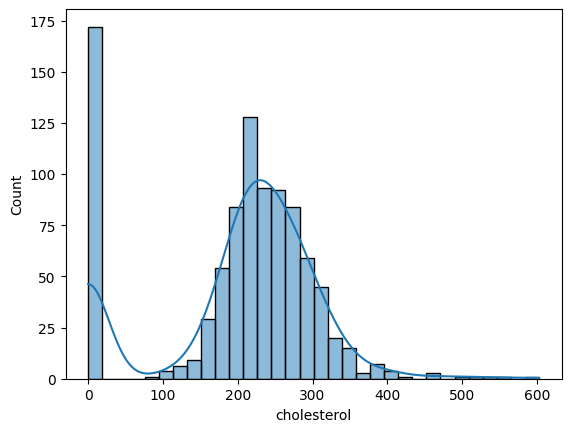

In [15]:
sns.histplot(df['cholesterol'], kde=True)


In [16]:
df.loc[df['cholesterol']==0, 'cholesterol']= np.nan
df['cholesterol'].fillna(df['cholesterol'].median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_20212\182116797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cholesterol'].fillna(df['cholesterol'].median(),inplace=True)


<Axes: xlabel='cholesterol', ylabel='Count'>

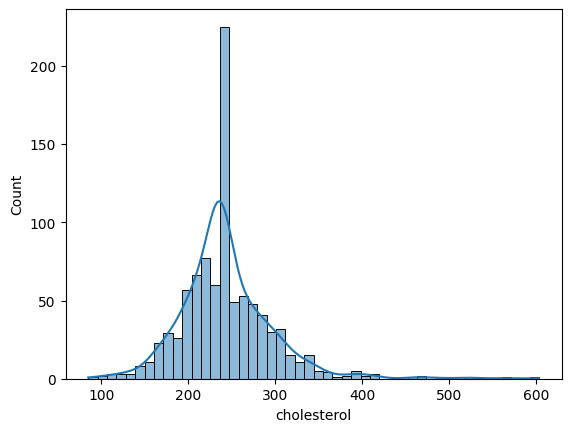

In [17]:
sns.histplot(df['cholesterol'],kde=True)

==========================================================================================================

- df_ori: original dataframe
- df= processed

Encoding- multiclass nominal features

In [18]:
df=pd.get_dummies(
    df,
    columns=['chest_pain_type','resting_ecg','st_slope'],
    drop_first=True
)

df_ori=pd.get_dummies(
    df_ori,
    columns=['chest_pain_type','resting_ecg','st_slope'],
    drop_first=True
)

In [19]:
df.head()

,age,sex,resting_bp_s,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,target,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_1,resting_ecg_2,st_slope_1,st_slope_2,st_slope_3
0,40,1,140,289.0,0,172,0,0.0,0,True,False,False,False,False,True,False,False
1,49,0,160,180.0,0,156,0,1.0,1,False,True,False,False,False,False,True,False
2,37,1,130,283.0,0,98,0,0.0,0,True,False,False,True,False,True,False,False
3,48,0,138,214.0,0,108,1,1.5,1,False,False,True,False,False,False,True,False
4,54,1,150,195.0,0,122,0,0.0,0,False,True,False,False,False,True,False,False


Spliting the data

In [20]:
X=df.drop('target',axis=1)
y=df['target']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [22]:
X_ori=df_ori.drop('target',axis=1)
y_ori=df_ori['target']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_ori,y_ori,random_state=42,test_size=0.2)

Scaling the values

In [23]:
df.dtypes

age                      int64
sex                      int64
resting_bp_s             int64
cholesterol            float64
fasting_blood_sugar      int64
max_heart_rate           int64
exercise_angina          int64
oldpeak                float64
target                   int64
chest_pain_type_2         bool
chest_pain_type_3         bool
chest_pain_type_4         bool
resting_ecg_1             bool
resting_ecg_2             bool
st_slope_1                bool
st_slope_2                bool
st_slope_3                bool
dtype: object

In [24]:
scale_cols=['age','resting_bp_s','cholesterol','max_heart_rate','oldpeak']

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train_scale=sc.fit_transform(X_train[scale_cols])
X_test_scale=sc.transform(X_test[scale_cols])

In [26]:
X_train_scale=pd.DataFrame(
    X_train_scale,
    columns=scale_cols,
    index=X_train.index
)

X_test_scale=pd.DataFrame(
    X_test_scale,
    columns=scale_cols,
    index=X_test.index
)

In [27]:
X_train=X_train.drop(columns=scale_cols,axis=1)
X_test=X_test.drop(columns=scale_cols,axis=1)

X_train=pd.concat([X_train,X_train_scale],axis=1)
X_test=pd.concat([X_test,X_test_scale],axis=1)

In [28]:
train_data=pd.concat([X_train,y_train],axis=1)
test_data=pd.concat([X_test,y_test],axis=1)

Saving the dataset and the standard scalar model

In [29]:
train_data.to_csv('../datasets/train_dataset.csv')
test_data.to_csv('../datasets/test_data.csv')

In [30]:
import pickle as pkl

with open('../models/scaling_model.pkl', 'wb') as f:
    pkl.dump(sc, f)